In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import altair as alt

In [28]:
# prompt to calude: Can you generate a user-movie rating matrix? users = ['Alice', 'Bob', 'Charlie', 'David'] movies = ['Parasite', 'Train to Busan', 'Inception', 'The Wolf of Wall Street', 'The Matrix', 'Forrest Gump', 'Avengers: Endgame', 'Spider-Man: Into the Spider-Verse', 'La La Land', 'Get Out', 'Dunkirk', 'Baby Driver', 'Blade Runner 2049', 'Arrival', 'The Grand Budapest Hotel'] Add 5 more users with desired genre. I want to use the matrix for testing my simple algorithm.
# Define users and movies
users = ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Heidi', 'Ivan']
movies = ['Parasite', 'Train to Busan', 'Inception', 'The Wolf of Wall Street', 'The Matrix', 'Forrest Gump', 'Avengers: Endgame', 'Spider-Man: Into the Spider-Verse', 'La La Land', 'Get Out', 'Dunkirk', 'Baby Driver', 'Blade Runner 2049', 'Arrival', 'The Grand Budapest Hotel']

# Define user preferences
user_preferences = {
    'Alice': ['Action', 'Sci-Fi'],
    'Bob': ['Drama', 'Comedy'],
    'Charlie': ['Horror', 'Thriller'],
    'David': ['Action', 'Adventure'],
    'Eve': ['Romance', 'Comedy'],
    'Frank': ['Action', 'Sci-Fi'],
    'Grace': ['Drama', 'Mystery'],
    'Heidi': ['Animation', 'Family'],
    'Ivan': ['Crime', 'Thriller']
}

# Define movie genres
movie_genres = {
    'Parasite': ['Drama', 'Thriller'],
    'Train to Busan': ['Horror', 'Action'],
    'Inception': ['Sci-Fi', 'Action'],
    'The Wolf of Wall Street': ['Biography', 'Crime', 'Drama'],
    'The Matrix': ['Sci-Fi', 'Action'],
    'Forrest Gump': ['Drama', 'Romance'],
    'Avengers: Endgame': ['Action', 'Adventure', 'Sci-Fi'],
    'Spider-Man: Into the Spider-Verse': ['Animation', 'Action', 'Adventure'],
    'La La Land': ['Comedy', 'Drama', 'Romance'],
    'Get Out': ['Horror', 'Mystery'],
    'Dunkirk': ['Action', 'Drama', 'History'],
    'Baby Driver': ['Action', 'Crime'],
    'Blade Runner 2049': ['Sci-Fi', 'Mystery'],
    'Arrival': ['Drama', 'Sci-Fi'],
    'The Grand Budapest Hotel': ['Adventure', 'Comedy', 'Drama']
}

# Create rating matrix
rating_matrix = np.zeros((len(users), len(movies)))

# Populate rating matrix
for i, user in enumerate(users):
    for j, movie in enumerate(movies):
        user_genres = user_preferences[user]
        movie_genres_set = set(movie_genres[movie])
        if any(genre in movie_genres_set for genre in user_genres):
            rating_matrix[i, j] = np.random.randint(3, 6)  # Rating between 3 and 5

print("User-Movie Rating Matrix:")
print(rating_matrix)
rating_matrix[rating_matrix < 0.5] = np.nan
ratings = rating_matrix

User-Movie Rating Matrix:
[[0. 5. 4. 0. 5. 0. 4. 3. 0. 0. 4. 4. 4. 4. 0.]
 [5. 0. 0. 3. 0. 3. 0. 0. 5. 0. 5. 0. 0. 3. 5.]
 [4. 4. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0.]
 [0. 3. 3. 0. 5. 0. 5. 4. 0. 0. 3. 4. 0. 0. 5.]
 [0. 0. 0. 0. 0. 5. 0. 0. 5. 0. 0. 0. 0. 0. 4.]
 [0. 5. 5. 0. 5. 0. 3. 4. 0. 0. 3. 4. 4. 5. 0.]
 [5. 0. 0. 3. 0. 4. 0. 0. 3. 5. 3. 0. 3. 3. 3.]
 [0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0.]
 [5. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0.]]


Step: 0, RMSE: 3.7326
Step: 1000, RMSE: 0.5389
Step: 2000, RMSE: 0.4095
Step: 3000, RMSE: 0.3532
Step: 4000, RMSE: 0.3351
Step: 5000, RMSE: 0.3284
Step: 6000, RMSE: 0.3248
Step: 7000, RMSE: 0.3224
Step: 8000, RMSE: 0.3204
Step: 9000, RMSE: 0.3186


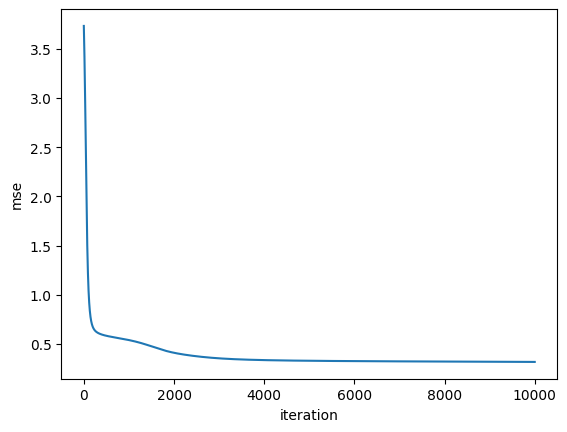

In [29]:

# Number of latent factors
k = 2

mses = []

# Function to compute the root mean squared error (RMSE)
def rmse(ratings, predicted_ratings):
    squared_errors = np.square(ratings - predicted_ratings)
    non_nan_errors = squared_errors[~np.isnan(squared_errors)]
    return np.sqrt(np.mean(non_nan_errors))

# Function to perform matrix factorization
def matrix_factorization(ratings, k, steps=10000, gamma=0.001):
    m, n = ratings.shape
    P = np.random.rand(m, k)  # User factor matrix
    Q = np.random.rand(n, k)  # Movie factor matrix

    for step in range(steps):
        for i in range(m):
            for j in range(n):
                if not np.isnan(ratings[i, j]):
                    err = ratings[i, j] - np.dot(P[i, :], Q[j, :].T)
                    P[i, :] += gamma * err * Q[j, :]
                    Q[j, :] += gamma * err * P[i, :]

        mses.append(rmse(ratings, np.dot(P, Q.T)))
        if step % 1000 == 0:
            print(f"Step: {step}, RMSE: {mses[-1]:.4f}")

    return P, Q

# Perform matrix factorization
P, Q = matrix_factorization(ratings, k)

# Predict ratings
predicted_ratings = np.dot(P, Q.T)

plt.plot(mses)
plt.xlabel("iteration"); plt.ylabel("mse")
plt.show()

In [30]:
# prompt example: Can you visualize predicted_rating matrix, using altair? I want to see user id and movie names. Can you use different colors depending on the preeicted_rating or rating?


# Create a DataFrame with the user IDs, movie names, ratings, and predicted ratings
df = pd.DataFrame({
    "user_id": np.repeat(users, len(movies)),
    "movie": np.tile(movies, len(users)),
    "rating": ratings.flatten(),
    "predicted_rating": predicted_ratings.flatten(),
})

# Create a scatter plot with the user IDs on the x-axis and the movie names on the y-axis
alt.Chart(df).mark_circle().encode(
    x="user_id:N",
    y="movie:N",
    color="rating:Q",
    tooltip=["user_id", "movie", "rating", "predicted_rating"],
).interactive()


alt.Chart(...)

In [31]:
# Create a heatmap with the user IDs on the x-axis and the movie names on the y-axis
alt.Chart(df).mark_rect().encode(
    x="user_id:N",
    y="movie:N",
    color="predicted_rating:Q",
    tooltip=["user_id", "movie", "rating", "predicted_rating"],
).interactive()


alt.Chart(...)

In [32]:
# visualize movie embedding
Q_df = pd.DataFrame(Q, columns=["x","y"])
df = Q_df.join(pd.DataFrame(movies, columns=["title"]))
chart = alt.Chart(df).mark_circle().encode(
    x='x', # Encoding along the x-axis
    y='y', # Encoding along the y-axis
    tooltip=['title'],
    # color='Origin', # Category encoding by color
)

chart.interactive()

alt.Chart(...)

# Appendix: Get user_rating_matrix from huggigface

In [1]:

!pip install datasets
from datasets import load_dataset
dataset = load_dataset("ashraq/movielens_ratings", split="validation")
# check data here: https://huggingface.co/datasets/ashraq/movielens_ratings

# prompt: Can you extract user-rating matrix from dataset?
# I manually change from userid to user_id

user_rating_matrix = dataset.map(lambda x: {'user_id': x["user_id"], 'item_id': x["movie_id"], 'rating': x["rating"]})
user_rating_matrix = user_rating_matrix.to_pandas()
user_rating_matrix = user_rating_matrix.pivot_table(index='user_id', columns='item_id', values='rating').fillna(0)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/891382 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/99043 [00:00<?, ? examples/s]

Map:   0%|          | 0/99043 [00:00<?, ? examples/s]

In [2]:
user_rating_matrix

item_id,4,5,7,9,12,14,16,17,18,19,...,15511,15540,15546,15547,15556,15557,15558,15559,15573,15581
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Appendix: Nonnegative matrix factorization (tood)